<a href="https://colab.research.google.com/github/sreehari59/Polar-Embedding/blob/main/4_list_comparison_with_Hofstede.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This is to load file from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [245]:
import pandas as pd

In [246]:
def polar_list(list):
  
  right_polar_list = []
  left_polar_list = []
  for i in range(0,len(list)):
    
    left_polar_list.append(list[i][0].replace("-","_"))
    right_polar_list.append(list[i][1].replace("-","_"))

  return left_polar_list,right_polar_list

In [247]:
def alphabetical_list_creation(list):
  new_list = []
  
  for i in range(0,len(list)):
    index_0 = list[i][0].replace("-","_")
    index_1 = list[i][1].replace("-","_")
    
    if index_0 < index_1:
      val = index_0+"-"+index_1
      new_list.append(val)
      
    else:
      val = index_1+"-"+index_0
      new_list.append(val)
      
  return new_list

In [248]:
def company_count(company_df,input_list,polar_embedding):  

  # we then find the number of companies grouped on the basis of location
  for i in input_list:
    print(i)    
    j = i.replace("-","")
    #print(j)
    j = j.replace("_","-")
    #print(j)
    subset_df2 = polar_embedding[polar_embedding[j] < 0]
    company_inclined_to_left_polar_df1 = subset_df2['Location'].value_counts()
    left_polar = i.split("-")[0]
    #print(left_polar)
    company_inclined_to_left_polar_df1 = pd.DataFrame({'Country':company_inclined_to_left_polar_df1.index, left_polar :company_inclined_to_left_polar_df1.values})
    company_df=pd.merge(company_df, company_inclined_to_left_polar_df1, how='left',on='Country')    
    company_df[left_polar] = round( company_df[left_polar] / company_df.iloc[:,1] * 100)

    subset_df1 = polar_embedding[polar_embedding[j] > 0]
    company_inclined_to_right_polar_df1 = subset_df1['Location'].value_counts()
    right_polar = i.split("-")[1]
    #print(right_polar)
    company_inclined_to_right_polar_df1 = pd.DataFrame({'Country':company_inclined_to_right_polar_df1.index, right_polar :company_inclined_to_right_polar_df1.values})
    company_df=pd.merge(company_df, company_inclined_to_right_polar_df1, how='left',on='Country')    
    company_df[right_polar] = round( company_df[right_polar] / company_df.iloc[:,1] * 100)


  company_df = company_df.fillna(0)

  # We are considering only the countries if the numberof companies in the country is over 3
  company_df = company_df[company_df['Total Count'] > 3]

  return company_df

In [249]:
def polar_ranking(polar_list,total_score,ranking,company_df):
  total_sum=0
  total_sum_list=[]
  polar_ranking_list = []
  polar_index=0
  for index,row in company_df.iterrows():  
    
    for i in polar_list:
      
      total_sum = total_sum + (row[i])
    #print(company_df.iloc[index,2:])  
    total_sum_list.append(total_sum/len(polar_list))
    polar_ranking_list.append(index+1)
    total_sum = 0

  company_df[total_score] = total_sum_list
  company_df= company_df.sort_values(by=[total_score],ascending=False)
  company_df[ranking] = polar_ranking_list

  return company_df

**Power distance index**

In [ ]:
list_powerdistance_random =[('make', 'break'), ('cameraman', 'playwright'), ('mystical', 'factual'), ('promotional', 'defamation'), ('iconic', 'unknown')]
nearest_random_list_powerdistance =[('making', 'breaking'), ('cameramen', 'dramatist'), ('magical', 'inaccuracies'), ('promo', 'libel'), ('recognizable', 'undetermined')]
list_powerdistance =[('hierarchical','non-hierarchical'),('superior','equal'),('leader','subordinate'),('inequality','equality'),('autocrat','democrat')]
nearest_human_list_powerdistance = [('hierarchy', 'consensus-based'), ('inferior', 'equalitys'), ('leaders', 'subordinates'), ('inequalities', 'equals'), ('autocratic', 'senator')]

**Individualism**

In [ ]:
list_individualism_random = [('lop', 'secure'), ('shah', 'poor'), ('pneumatic', 'solid'), ('interpret', 'misinterpret'), ('confer', 'refuse')]
nearest_random_list_individualism= [('buri', 'securing'), ('ahmad', 'poorer'), ('hydraulic', 'consistent'), ('interpreting', 'misunderstand'), ('conferring', 'refusing')]
list_individualism = [('individuality','community'),('self-interest','harmony'),('tasks','relationships'),('individual','groups'),('universalism','particularism')]
nearest_human_list_individualism = [('originality', 'communities'), ('selfishness', 'harmonious'), ('task', 'relationship'), ('individuals', 'group'), ('mangxamba', 'unitarianism')]

**Masculinity**

In [ ]:
list_masculinity_random = [('try', 'abstain'), ('fatalistic', 'freewill'), ('knowledgeable', 'uninformed'), ('confine', 'free'), ('fan', 'warm')]
nearest_random_list_masculinity = [('trying', 'abstaining'), ('nonchalant', 'gmv'), ('knowledgable', 'misinformed'), ('confining', 'freedom'), ('fans', 'cool')]
list_masculinity = [('achievement', 'support'),('competitive', 'caring'),('assertive', 'submissive'),('ambitious', 'unambitious'),('sucess','cooperation')]
nearest_human_list_masculinity = [('achievements', 'supported'), ('competition', 'loving'), ('forceful', 'subservient'), ('undertaking', 'unathletic'), ('ufauthor', 'bilateral')]

**Long term orientation**

In [ ]:
list_longterm_random = [('innovator', 'follower'), ('sensory', 'numb'), ('hedge', 'squander'), ('arachnid', 'serpent'), ('disclose', 'secrete')]
nearest_random_list_longterm = [('visionary', 'disciple'), ('auditory', 'numbed'), ('fund', 'squandering'), ('itsy', 'serpents'), ('disclosing', 'secreted')]
list_longterm = [('pragmatic','normative'),('progress','preserve'),('adapt','conserve'),('developing','stable'),('advance','retain')]
nearest_human_list_longterm = [('pragmatism', 'conceptions'), ('efforts', 'preserving'), ('adapting', 'conserving'), ('develop', 'stability'), ('advancing', 'retained')]

**Indulgence**

In [ ]:
list_indulgence_random = [('diagnose', 'sicken'), ('intercourse', 'disconnection'), ('sensory', 'sensorial'), ('emasculate', 'strengthen'), ('metropolitan', 'rural')]
nearest_random_list_indulgence = [('diagnosing', 'sickens'), ('sexual', 'disconnect'), ('auditory', 'skorokhod'), ('disempower', 'strengthening'), ('metro', 'urban')]
list_indulgence = [('fulfillment','restriction'),('satisfaction','limitation'),('liberty','moderation'),('expand','direct'),('freedom','regulation')]
nearest_human_list_indulgence = [('fulfilment', 'restrictions'), ('satisfied', 'limitations'), ('fredom', 'restraint'), ('expanding', 'indirect'), ('freedoms', 'regulations')]

**Uncertainty avoidance**

In [ ]:
list_uncertainity_avoidance_random = [('stretcher', 'compressor'), ('amalgamate', 'separate'), ('caretaker', 'assailant'), ('taker', 'violator'), ('contaminate', 'sterilize')]
nearest_random_list_uncertainity_avoidance = [('stretchers', 'compressors'), ('amalgamating', 'separately'), ('interim', 'assailants'), ('takers', 'violators'), ('contaminating', 'sterilized')]
list_uncertainity_avoidance = [('clarity','complexity'),('clear','ambiguous'),('certain','uncertain'),('uniformity','diversity'),('agreement','variation')]
nearest_human_list_uncertainity_avoidance = [('simplicity', 'complexities'), ('yet', 'vague'), ('particular', 'unclear'), ('homogeneity', 'diverse'), ('agreements', 'variations')]

In [254]:
# Power distance 	, Individualism 	, Masculinity 	,  Long term orientation 	, Indulgence , Uncertainty avoidance
hof = "Individualism"
dimension = hof+" index"
dimension_ranking = hof+" Ranking"

# The below line wil split the list into left polar and right polar. For example an antonym pair ('hierarchy', 'consensus-based') will have left polar = 'hierarchy' and right polar  = 'consensus-based'
left_polar_list_random,right_polar_list_random = polar_list(list_individualism_random)
left_polar_list_nearest_random,right_polar_list_nearest_random = polar_list(nearest_random_list_individualism)
left_polar_list_human,right_polar_list_human = polar_list(list_individualism)
left_polar_list_nearest_human,right_polar_list_nearest_human = polar_list(nearest_human_list_individualism)


input_list_random = alphabetical_list_creation(list_individualism_random)
input_list_nearest_random = alphabetical_list_creation(nearest_random_list_individualism)
input_list_human = alphabetical_list_creation(list_individualism)
input_list_nearest_human = alphabetical_list_creation(nearest_human_list_individualism)


In [255]:
new_df = pd.read_csv('/content/drive/MyDrive/Polar Embedding/120 dimension polar embedding.csv')

fortune_500_company = pd.read_csv('/content/drive/MyDrive/Fortune Global 500 companies.csv',encoding= 'unicode_escape')
fortune_500_company['Company'] = fortune_500_company['Company'].str.lower()
fortune_500_company['Company'] = fortune_500_company['Company'].str.replace(" ","")

polar_embedding = pd.merge(fortune_500_company,new_df,how="right",left_on="Company",right_on="Unnamed: 0")

polar_embedding= polar_embedding.drop(['Rank'],axis=1) # This will drop the column Rank
polar_embedding= polar_embedding.drop(['Unnamed: 0'],axis=1) # This will drop the column Rank


# This will find the total number of companies in our data frame based on Location
total_company_list_based_on_loc = polar_embedding['Location'].value_counts()
total_company_count_df = pd.DataFrame({'Country':total_company_list_based_on_loc.index, 'Total Count':total_company_list_based_on_loc.values})
print(total_company_count_df.head())

   Country  Total Count
0      USA           52
1    Japan           18
2  Germany           12
3  Britain           10
4   France            9


In [256]:
polar_embedding.head()

,Company,Location,cameramanplaywright,defamationpromotional,factualmystical,iconicunknown,breakmake,libelpromo,cameramendramatist,inaccuraciesmagical,...,claritycomplexity,diversityuniformity,agreementvariation,certainuncertain,ambiguousclear,complexitiessimplicity,particularunclear,agreementsvariations,vagueyet,diversehomogeneity
0,walmart,USA,0.371066,-0.722755,0.425693,0.396845,-0.035118,-0.817515,0.364872,0.323487,...,0.312973,0.658039,0.017043,0.170584,0.663056,-0.147586,0.299081,0.487809,0.585231,-0.555262
1,amazon,USA,-0.145381,-0.570718,-0.334907,-0.402562,-0.615570,0.001971,0.171113,-0.648188,...,-0.203010,0.776824,0.133336,-0.184639,-0.550873,-0.294728,-0.228069,0.313153,-0.714932,0.501923
2,apple,USA,-0.134910,-0.518285,0.050695,0.529650,-0.655805,0.069537,0.397531,-0.260274,...,-0.303978,0.601685,0.143248,0.207181,-0.694355,-0.719476,0.124299,-0.082344,-0.371139,0.567785
3,volkswagen,Germany,0.037635,-0.570901,0.198001,0.691502,-0.394050,-0.115727,0.103319,0.102456,...,0.472561,0.577821,0.342084,-0.022607,-0.570330,-0.234634,-0.227949,0.573894,-0.571768,-0.486531
4,mckesson,USA,0.014458,0.214785,0.413642,0.765071,-0.444100,0.014886,0.241910,0.758793,...,0.678710,-0.349290,0.407216,0.150137,0.478523,0.447067,-0.538712,0.442195,0.052229,-0.558262


In [257]:
company_df=total_company_count_df.copy()  # This make a copy of data frame

#Below lines will find the number of companies aligned to the respective left word in antonym pair

company_df = company_count(company_df,input_list_random,polar_embedding)
company_df = company_count(company_df,input_list_nearest_random,polar_embedding)
company_df = company_count(company_df,input_list_human,polar_embedding)
company_df = company_count(company_df,input_list_nearest_human,polar_embedding)


#Below lines will find the total score based on the left word and final give a ranking
company_df = polar_ranking(left_polar_list_random,"Total Score Random","Polar Rank R",company_df)
company_df = polar_ranking(left_polar_list_nearest_random,"Total Score Nearest Random","Polar Rank Nearest R",company_df)
company_df = polar_ranking(left_polar_list_human,"Total Score Human","Polar Rank H",company_df)
company_df = polar_ranking(left_polar_list_nearest_human,"Total Score Nearest Human","Polar Rank Nearest H",company_df)

lop-secure
poor-shah
pneumatic-solid
interpret-misinterpret
confer-refuse
buri-securing
ahmad-poorer
consistent-hydraulic
interpreting-misunderstand
conferring-refusing
community-individuality
harmony-self_interest
relationships-tasks
groups-individual
particularism-universalism
communities-originality
harmonious-selfishness
relationship-task
group-individuals
mangxamba-unitarianism


In [258]:
# This will dop all the word pairs from the data fram
length = len(left_polar_list_random) + len(left_polar_list_nearest_random) + len(left_polar_list_human) + len(left_polar_list_nearest_human)
company_df.drop(company_df.iloc[:, 2:2+(length)*2], axis = 1, inplace = True)
company_df.head(7)

# This loads the Hofsted 6 dimension csv file
hofstede_df = pd.read_csv("/content/drive/MyDrive/Polar Embedding/Hofstede 6 dimensions.csv",sep=";")
hofstede_df=hofstede_df[hofstede_df.iloc[:,:]!="#NULL!" ]
hofstede_df.dropna(axis=0)

# This merge the company dataframe and Hofstede dataframe over the common column Country
merged_df = pd.merge(company_df, hofstede_df, how='left',on='Country')
merged_df.head(10)

,Country,Total Count,Total Score Random,Polar Rank R,Total Score Nearest Random,Polar Rank Nearest R,Total Score Human,Polar Rank H,Total Score Nearest Human,Polar Rank Nearest H,ctr,Power distance index,Individualism index,Masculinity index,Uncertainty avoidance index,Long term orientation index,Indulgence index
0,Switzerland,5,40.0,7,52.0,7,48.0,6,60.0,2,SWI,34,68,70,58,74,66
1,France,9,48.8,5,46.6,5,44.6,2,60.0,7,FRA,68,71,43,86,63,48
2,Britain,10,56.0,3,56.0,3,50.0,1,58.0,4,GBR,35,89,66,35,51,69
3,USA,52,56.8,1,55.0,4,45.4,5,53.2,6,USA,40,91,62,46,26,68
4,Germany,12,56.6,2,60.0,1,41.8,7,51.8,1,GER,35,67,66,65,83,40
5,Japan,18,40.0,6,46.6,2,55.8,3,47.6,5,JPN,54,46,95,92,88,42
6,South Korea,4,50.0,4,45.0,6,55.0,4,45.0,3,KOR,60,18,39,85,100,29


In [259]:
merged_df.head(10)

,Country,Total Count,Total Score Random,Polar Rank R,Total Score Nearest Random,Polar Rank Nearest R,Total Score Human,Polar Rank H,Total Score Nearest Human,Polar Rank Nearest H,ctr,Power distance index,Individualism index,Masculinity index,Uncertainty avoidance index,Long term orientation index,Indulgence index
0,Switzerland,5,40.0,7,52.0,7,48.0,6,60.0,2,SWI,34,68,70,58,74,66
1,France,9,48.8,5,46.6,5,44.6,2,60.0,7,FRA,68,71,43,86,63,48
2,Britain,10,56.0,3,56.0,3,50.0,1,58.0,4,GBR,35,89,66,35,51,69
3,USA,52,56.8,1,55.0,4,45.4,5,53.2,6,USA,40,91,62,46,26,68
4,Germany,12,56.6,2,60.0,1,41.8,7,51.8,1,GER,35,67,66,65,83,40
5,Japan,18,40.0,6,46.6,2,55.8,3,47.6,5,JPN,54,46,95,92,88,42
6,South Korea,4,50.0,4,45.0,6,55.0,4,45.0,3,KOR,60,18,39,85,100,29


In [260]:
ranking_list = []
for i in range(1,len(merged_df[dimension])+1):
  ranking_list.append(i)
merged_df= merged_df.sort_values(by=[dimension],ascending=False)
merged_df[dimension_ranking] = ranking_list
merged_df.head(10)

,Country,Total Count,Total Score Random,Polar Rank R,Total Score Nearest Random,Polar Rank Nearest R,Total Score Human,Polar Rank H,Total Score Nearest Human,Polar Rank Nearest H,ctr,Power distance index,Individualism index,Masculinity index,Uncertainty avoidance index,Long term orientation index,Indulgence index,Individualism Ranking
3,USA,52,56.8,1,55.0,4,45.4,5,53.2,6,USA,40,91,62,46,26,68,1
2,Britain,10,56.0,3,56.0,3,50.0,1,58.0,4,GBR,35,89,66,35,51,69,2
1,France,9,48.8,5,46.6,5,44.6,2,60.0,7,FRA,68,71,43,86,63,48,3
0,Switzerland,5,40.0,7,52.0,7,48.0,6,60.0,2,SWI,34,68,70,58,74,66,4
4,Germany,12,56.6,2,60.0,1,41.8,7,51.8,1,GER,35,67,66,65,83,40,5
5,Japan,18,40.0,6,46.6,2,55.8,3,47.6,5,JPN,54,46,95,92,88,42,6
6,South Korea,4,50.0,4,45.0,6,55.0,4,45.0,3,KOR,60,18,39,85,100,29,7


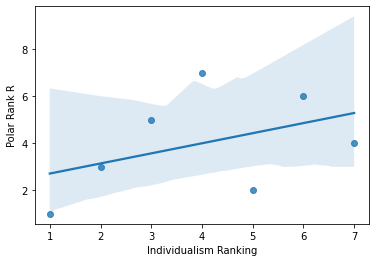

In [261]:
import seaborn as sns
sns.regplot(x=merged_df[dimension_ranking], y=merged_df["Polar Rank R"])


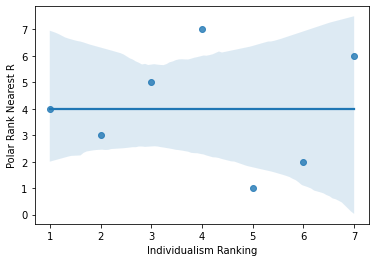

In [262]:
sns.regplot(x=merged_df[dimension_ranking], y=merged_df["Polar Rank Nearest R"])

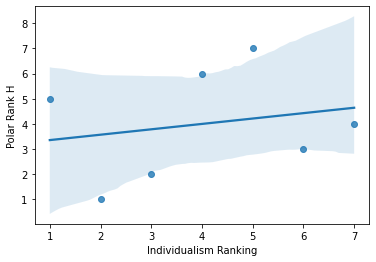

In [263]:
sns.regplot(x=merged_df[dimension_ranking], y=merged_df["Polar Rank H"])

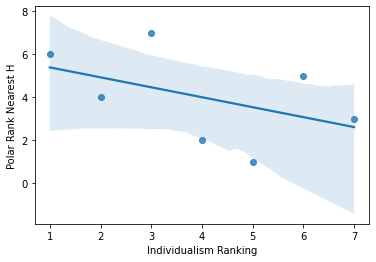

In [264]:
sns.regplot(x=merged_df[dimension_ranking], y=merged_df["Polar Rank Nearest H"])

In [265]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = go.Figure()
fig = make_subplots(rows=2, cols=2)

fig_name = "Hofstede "+dimension+"(Score)"

fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df[dimension].astype(int), name = fig_name),1,1)  
fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df["Total Score Random"].astype(int), name = "Random Polar Score"),1,1)  

fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df[dimension].astype(int), name = fig_name),1,2)  
fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df["Total Score Nearest Random"].astype(int), name = "Nearest Random Polar Score"),1,2)  

fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df[dimension].astype(int), name = fig_name),2,1)  
fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df["Total Score Human"].astype(int), name = "Human Polar Score"),2,1)  

fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df[dimension].astype(int), name = fig_name),2,2)  
fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df["Total Score Nearest Human"].astype(int), name = "Nearest Human Polar Score"),2,2) 

fig.show() 

In [266]:
from sklearn.metrics import mean_absolute_error

MAE = []
MAE_of_Score = []

MAE.append(mean_absolute_error(merged_df[dimension_ranking], merged_df["Polar Rank R"]))
MAE.append(mean_absolute_error(merged_df[dimension_ranking], merged_df["Polar Rank Nearest R"]))
MAE.append(mean_absolute_error(merged_df[dimension_ranking], merged_df["Polar Rank H"]))
MAE.append(mean_absolute_error(merged_df[dimension_ranking], merged_df["Polar Rank Nearest H"]))


MAE_of_Score.append(mean_absolute_error(merged_df[dimension], merged_df["Total Score Random"]))
MAE_of_Score.append(mean_absolute_error(merged_df[dimension], merged_df["Total Score Nearest Random"]))
MAE_of_Score.append(mean_absolute_error(merged_df[dimension], merged_df["Total Score Human"]))
MAE_of_Score.append(mean_absolute_error(merged_df[dimension], merged_df["Total Score Nearest Human"]))


In [267]:
correlation = []

correlation.append(merged_df["Polar Rank R"].corr(merged_df[dimension_ranking]))
correlation.append(merged_df["Polar Rank Nearest R"].corr(merged_df[dimension_ranking]))
correlation.append(merged_df["Polar Rank H"].corr(merged_df[dimension_ranking]))
correlation.append(merged_df["Polar Rank Nearest H"].corr(merged_df[dimension_ranking]))

In [268]:
eval_data = {"Mean Absolute Error of Rank" : MAE,
              "Correlation" : correlation,
             "Mean Absolute Error of Score" : MAE_of_Score
            }

eval_df = pd.DataFrame(eval_data, index =["Random List", "Nearest Random List","Human Made List","Nearest to Human Made List"])
eval_df.head()

,Mean Absolute Error of Rank,Correlation,Mean Absolute Error of Score
Random List,1.714286,0.428571,23.685714
Nearest Random List,2.571429,0.000000,20.571429
Human Made List,2.285714,0.214286,29.000000
Nearest to Human Made List,3.142857,-0.464286,18.800000


In [269]:
corr = merged_df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1).highlight_null(null_color='#f1f1f1').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,Total Count,Total Score Random,Polar Rank R,Total Score Nearest Random,Polar Rank Nearest R,Total Score Human,Polar Rank H,Total Score Nearest Human,Polar Rank Nearest H,Individualism Ranking
Total Count,1.00,0.38,-0.60,0.28,-0.23,-0.23,0.15,-0.10,0.46,-0.58
Total Score Random,0.38,1.00,-0.95,0.62,-0.39,-0.51,0.01,0.00,0.00,-0.47
Polar Rank R,-0.60,-0.95,1.00,-0.61,0.46,0.44,-0.14,0.18,-0.04,0.43
Total Score Nearest Random,0.28,0.62,-0.61,1.00,-0.50,-0.67,0.42,0.29,-0.44,-0.48
Polar Rank Nearest R,-0.23,-0.39,0.46,-0.50,1.00,0.17,0.00,0.28,0.07,0.00
Total Score Human,-0.23,-0.51,0.44,-0.67,0.17,1.00,-0.41,-0.57,0.06,0.55
Polar Rank H,0.15,0.01,-0.14,0.42,0.00,-0.41,1.00,-0.17,-0.64,0.21
Total Score Nearest Human,-0.10,0.00,0.18,0.29,0.28,-0.57,-0.17,1.00,0.18,-0.69
Polar Rank Nearest H,0.46,0.00,-0.04,-0.44,0.07,0.06,-0.64,0.18,1.00,-0.46
Individualism Ranking,-0.58,-0.47,0.43,-0.48,0.00,0.55,0.21,-0.69,-0.46,1.00


In [270]:
from scipy.stats import ttest_ind
import numpy as np

t1 = merged_df[dimension].astype(int)
t2 =  merged_df["Total Score Human"].astype(int)

t1_mean = np.mean(t1)
t2_mean = np.mean(t2)

print("t1 mean value:",t1_mean)
print("t2 mean value:",t2_mean)
t1_std = np.std(t1)
t2_std = np.std(t1)
print("t1 std value:",t1_std)
print("t2 std value:",t2_std)

ttest,pval = ttest_ind(t1,t2)

print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

t1 mean value: 64.28571428571429
t2 mean value: 48.285714285714285
t1 std value: 23.505101487089295
t2 std value: 23.505101487089295
p-value 0.12888150931811324
we accept null hypothesis
